In [1]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [2]:
fred_df = pdr.DataReader('CPILFESL', 'fred', "2019-01-01", "2022-12-31") \
            .rename(columns={'CPILFESL':'Consumer Price Index (excl. Food and Energy)'})

fred_df.head()

,Consumer Price Index (excl. Food and Energy)
DATE,
2019-01-01,260.534
2019-02-01,260.885
2019-03-01,261.382
2019-04-01,261.958
2019-05-01,262.321


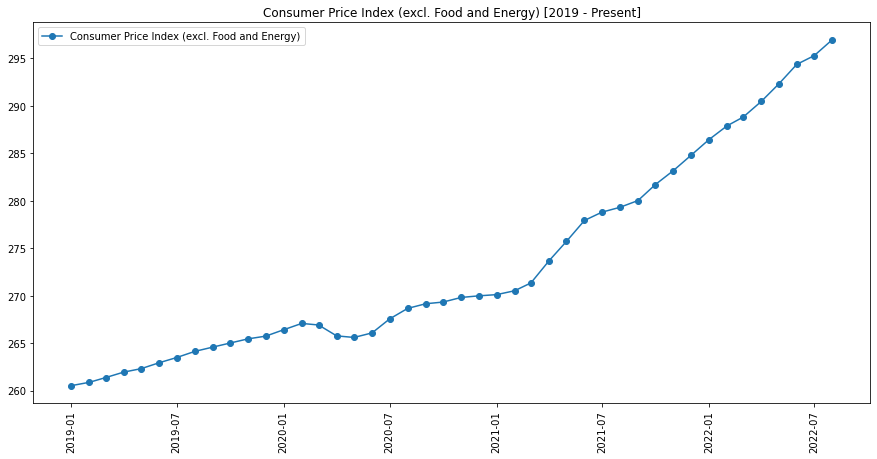

In [3]:
fig = plt.figure(figsize=(15,7))
plt.plot(fred_df.loc["2019":], 'o-')
plt.xticks(rotation=90)
plt.legend(fred_df.columns)
plt.title("Consumer Price Index (excl. Food and Energy) [2019 - Present]")
plt.show()

In [4]:
cpidata = fred_df.iloc[:,0]

# Double: Holt's Exponential Smoothing Method

C:\Users\nwheatle\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\nwheatle\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\nwheatle\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


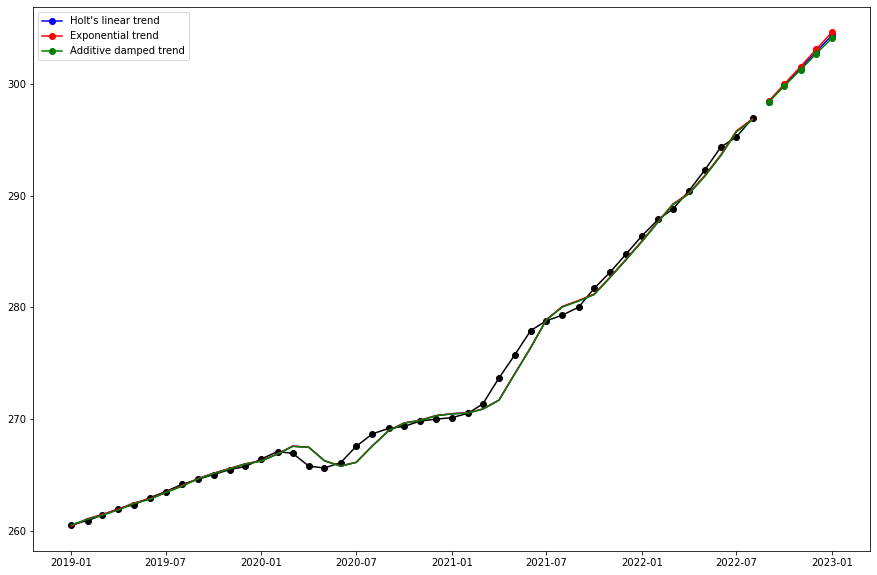

In [5]:
fit1 = Holt(cpidata, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fit2 = Holt(cpidata, exponential=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast2 = fit2.forecast(5).rename("Exponential trend")
fit3 = Holt(cpidata, damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2
)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(15, 10))
plt.plot(cpidata, marker="o", color="black")
plt.plot(fit1.fittedvalues, color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])


In [6]:
fcast1

2022-09-01    298.424847
2022-10-01    299.919330
2022-11-01    301.413813
2022-12-01    302.908296
2023-01-01    304.402779
Freq: MS, Name: Holt's linear trend, dtype: float64

# Triple: Holt Winters Seasonal Smoothing

In [37]:
data = [
    41.7275,
    24.0418,
    32.3281,
    37.3287,
    46.2132,
    29.3463,
    36.4829,
    42.9777,
    48.9015,
    31.1802,
    37.7179,
    40.4202,
    51.2069,
    31.8872,
    40.9783,
    43.7725,
    55.5586,
    33.8509,
    42.0764,
    45.6423,
    59.7668,
    35.1919,
    44.3197,
    47.9137,
]
index = pd.date_range(start="2005", end="2010-Q4", freq="QS-OCT")
aust = pd.Series(data, index)

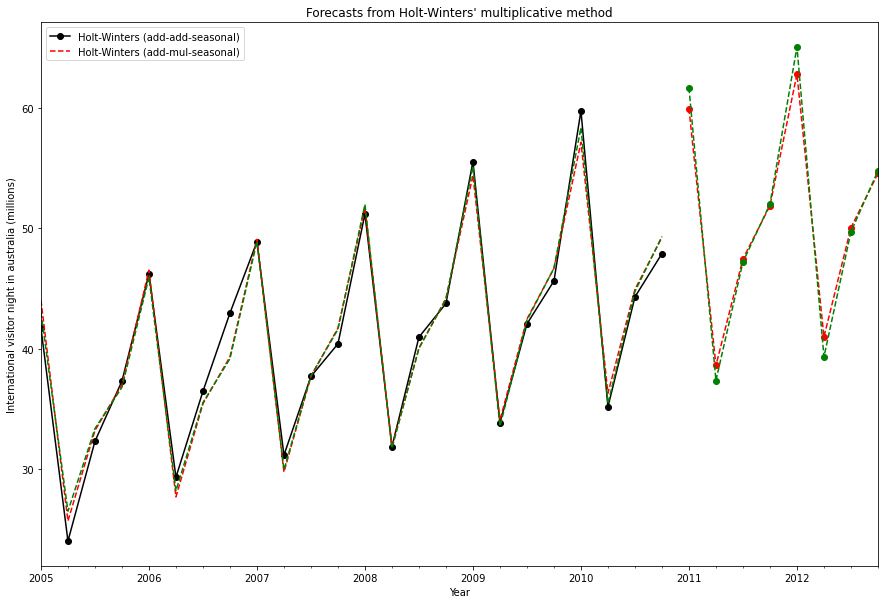

Figure 7.6: Forecasting international visitor nights in australia using Holt-Winters method with both additive and multiplicative seasonality.


,Additive,Multiplicative,Additive Dam,Multiplica Dam
$\alpha$,1.490116e-08,1.490116e-08,1.490116e-08,1.490116e-08
$\beta$,1.409862e-08,3.449544e-23,6.490775e-09,5.042224e-09
$\phi$,NaN,NaN,9.430416e-01,9.536044e-01
$\gamma$,1.829110e-16,2.550777e-15,3.872323e-16,5.847315e-16
$l_0$,1.119347e+01,1.106378e+01,1.084021e+01,9.899276e+00
$b_0$,1.205396e-01,1.198959e-01,2.456749e-01,1.975442e-01
SSE,4.402746e+01,3.611262e+01,3.527619e+01,3.062033e+01


In [51]:
fit1 = ExponentialSmoothing(
    aust,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit2 = ExponentialSmoothing(
    aust,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit3 = ExponentialSmoothing(
    aust,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit4 = ExponentialSmoothing(
    aust,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
results["Additive"] = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"] = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

ax = aust.plot(
    figsize=(15, 10),
    marker="o",
    color="black",
    title="Forecasts from Holt-Winters' multiplicative method",
)
ax.set_ylabel("International visitor night in australia (millions)")
ax.set_xlabel("Year")
fit1.fittedvalues.plot(ax=ax, style="--", color="red")
fit2.fittedvalues.plot(ax=ax, style="--", color="green")

fit1.forecast(8).rename("Holt-Winters (add-add-seasonal)").plot(
    ax=ax, style="--", marker="o", color="red", legend=True
)
fit2.forecast(8).rename("Holt-Winters (add-mul-seasonal)").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)

plt.show()
print(
    "Figure 7.6: Forecasting international visitor nights in australia using Holt-Winters method with both additive and multiplicative seasonality."
)

results

# Holt Winters Formula:

## Smoothing Constants
$\alpha$ - Alpha - Level

$\beta$ - Beta - Trend

$\gamma$ - Gamma - Seasonality

![alt text](holt_winters_formula.jpg "Holt Winters Formula")